# Modelli per Risposte Politomiche {#sec-irt-poly}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [1]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(
    eRm, mirt, grid, TAM, ggmirt, psychotools, WrightMap,
    latex2exp, kableExtra
)

## Introduzione

In questo capitolo, esamineremo i modelli per risposte politomiche. La nostra esplorazione inizia con un passo indietro, riconoscendo l'origine e l'evoluzione di questi modelli dal loro antenato più semplice: il modello dicotomico. Finora ci siamo affidati a quest'ultimo per interpretare risposte che cadevano in una dicotomia di 'corretto' o 'errato', 'accordo' o 'disaccordo'. Il passaggio ai modelli politomici ci permette di considerare risposte che vanno oltre il semplice sì o no. In un test di matematica, ad esempio, possiamo ora riconoscere e attribuire valore a risposte parzialmente corrette. In un questionario sulla personalità, siamo in grado di misurare diversi gradi di accordo o intensità di un tratto, piuttosto che limitarci a una risposta binaria.

Questi modelli politomici si presentano come estensioni naturali del modello Rasch. Nel corso di questo capitolo, esploreremo in dettaglio tre modelli politomici chiave: il modello a Crediti Parziali, il modello a Scala di Valutazione e il modello di Risposta Graduata. 

## Modello a Crediti Parziali

Il **Modello a Crediti Parziali (Partial Credit Model, PCM)** è una generalizzazione del modello di Rasch progettata per analizzare item con più di due categorie di risposta ordinate. A differenza del modello di Rasch binario, che valuta solo la probabilità di una risposta corretta o errata, il PCM considera transizioni graduali tra le categorie di risposta. Questo approccio permette di catturare informazioni più dettagliate, specialmente in contesti dove le risposte sono strutturate su più livelli, come sondaggi, questionari o test con scale Likert.

Immaginiamo un item con tre categorie di risposta ordinate: "in disaccordo" ($0$), "neutrale" ($1$) e "d'accordo" ($2$). Nel PCM, la probabilità di selezionare una specifica categoria viene calcolata come una sequenza di probabilità condizionate:

1. La probabilità di passare dalla categoria 0 alla categoria 1 dipende dal livello di abilità del rispondente ($\theta_p$) e dalla difficoltà della transizione specifica ($\delta_{i1}$).
2. La probabilità di passare successivamente dalla categoria 1 alla categoria 2 è calcolata in modo analogo.

Questa visione "a tappe" implica che il modello non considera direttamente la probabilità di scegliere una categoria finale, ma valuta il processo di raggiungimento di quella categoria attraverso transizioni successive.

La probabilità condizionale di passare da una categoria$x-1$ a$x$ è descritta dalla funzione logistica:

$$
\frac{P_{pix}}{P_{pi(x-1)}} = \exp(\theta_p - \delta_{ix}),
$$

dove:

- $P_{pix}$ è la probabilità di scegliere la categoria$x$ condizionata al superamento di$x-1$,
- $\theta_p$ rappresenta l'abilità del rispondente,
- $\delta_{ix}$ è il parametro di difficoltà della transizione tra le categorie$x-1$ e$x$.

La probabilità complessiva di selezionare una categoria specifica viene calcolata moltiplicando le probabilità condizionali di tutte le transizioni necessarie per raggiungere quella categoria:

$$
P_{pij} = \prod_{k=1}^{j} \frac{P_{pik}}{P_{pi(k-1)}}.
$$

Questo metodo tiene conto dell'intera sequenza di transizioni, garantendo che la somma delle probabilità per tutte le categorie sia pari a uno.


### Curve Caratteristiche della Categoria

Le **Curve Caratteristiche della Categoria (Category Characteristic Curves, CCC)** sono strumenti visivi essenziali nel PCM per comprendere come le probabilità di scegliere ciascuna categoria cambiano al variare del livello di abilità del rispondente ($\theta_p$).

Per un item con $k$ categorie di risposta:

1. **Curve a campana per categorie intermedie**: Le categorie intermedie, come "neutrale" in un esempio a tre livelli, mostrano una curva probabilistica a forma di campana. Questo indica che tali categorie sono più probabili per un intervallo specifico di abilità.
2. **Curve crescenti o decrescenti per categorie estreme**: Le categorie più basse (es. "in disaccordo") mostrano una probabilità decrescente con l’aumentare dell’abilità, mentre quelle più alte (es. "d'accordo") hanno una probabilità crescente.
3. **Soglie di transizione ($\delta$)**: I punti lungo l’asse dell’abilità in cui la probabilità di scegliere due categorie adiacenti è la stessa sono definiti soglie. Questi rappresentano il livello di abilità richiesto per passare da una categoria all’altra.

Ad esempio, in un item con quattro categorie:

- La prima soglia ($\delta_{i1}$) rappresenta il punto in cui la probabilità di scegliere "neutrale" supera quella di scegliere "in disaccordo".
- La seconda soglia ($\delta_{i2}$) indica il passaggio da "neutrale" a "d'accordo".

Le soglie di transizione svolgono un ruolo analogo alla difficoltà ($b$) nel modello di Rasch, definendo il livello di abilità necessario per un cambiamento di probabilità tra categorie adiacenti.

::: {#exr-}

Immaginando un item con quattro categorie, le CCC mostreranno:

- Una curva per ogni categoria, con la somma delle probabilità pari a 1 in ogni punto.
- Le curve per categorie intermedie sovrapposte, a indicare che ciascuna è predominante solo in un intervallo limitato di abilità.

::: {#fig-debelak_fig_11_1}
![](../../figures/debelak_fig_11_1.png){width="80%"}

Curve Caratteristiche delle Categorie per un item con parametri di soglia $ \delta_{i1}, \delta_{i2}, \delta_{i3} $. I numeri in grassetto indicano la categoria con la più alta probabilità di risposta.  (Figura tratta da @debelak2022introduction).
:::

L’analisi delle CCC consente inoltre di identificare item problematici, come categorie sovrapposte o curve non ben definite, migliorando la qualità del test.
:::

::: {#exr-}
Per un'applicazione pratica del PCM, consideriamo i dati forniti da @braun1988understanding. Il dataset originale include valutazioni di 32 studenti fatte da 12 valutatori su tre diverse composizioni scritte. Per questa analisi, ci concentreremo sui dati relativi alla prima composizione. Per semplificare l'interpretazione, le valutazioni delle composizioni nel dataset originale sono state ricodificate, passando da nove a tre categorie (0 = basso rendimento, 1 = rendimento medio; 2 = alto rendimento).

Nella nostra analisi, tratteremo i 12 valutatori come se fossero 12 "item" politomici che condividono la struttura di una scala di valutazione a tre categorie.

I valutatori con una calibrazione di "difficoltà" elevata possono essere interpretati come severi: questi valutatori tendono ad assegnare punteggi bassi più frequentemente. Al contrario, valutatori con una calibrazione di "difficoltà" bassa possono essere interpretati come indulgenti: questi valutatori tendono ad assegnare punteggi alti più frequentemente.

In [2]:
braun_data <- read_csv("../../data/braun_data.csv")
head(braun_data)

Rows: 32 Columns: 13
-- Column specification ----------------------------------------------------
Delimiter: ","
dbl (13): Student, rater_1, rater_2, rater_3, rater_4, rater_5, rater_6,...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Student,rater_1,rater_2,rater_3,rater_4,rater_5,rater_6,rater_7,rater_8,rater_9,rater_10,rater_11,rater_12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,2,3,2,3,3,3,2,3,3
2,2,2,2,2,2,1,2,2,2,2,1,2
3,2,1,2,2,2,2,1,2,1,2,2,2
4,1,2,2,2,1,2,1,1,1,2,2,2
5,2,2,1,2,2,3,2,2,2,2,2,2
6,2,2,2,3,2,2,3,2,1,2,2,2


Eliminiamo la colonna con l'identificativo dei partecipanti:

In [3]:
PC_data <- braun_data[, -1]

Sottraiamo 1 dalle osservazioni così che la cagegoria inferiore abbia valore 0, come richiesto da `eRm`.

In [4]:
PC_data_balanced <- PC_data - 1

Adattiamo ai dati il Partial Credit Model:

In [5]:
PC_model <- PCM(PC_data_balanced)

In [6]:
for (i in 1:12) {
    rater_col_name <- paste("rater", i, sep = "_")
    unique_sorted_values <- sort(unique(PC_data_balanced[[rater_col_name]]))
    print(unique_sorted_values)
}

[1] 0 1 2
[1] 0 1
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2
[1] 0 1 2


In [7]:
summary(PC_model)


Results of PCM estimation: 

Call:  PCM(X = PC_data_balanced) 

Conditional log-likelihood: -176 
Number of iterations: 85 
Number of parameters: 22 

Item (Category) Difficulty Parameters (eta): with 0.95 CI:
            Estimate Std. Error lower CI upper CI
rater_1.c2     3.431      1.089    1.296    5.565
rater_2.c1    -1.037      0.479   -1.976   -0.099
rater_3.c1    -0.193      0.436   -1.048    0.662
rater_3.c2     3.394      0.854    1.720    5.069
rater_4.c1    -3.621      1.007   -5.594   -1.647
rater_4.c2    -1.933      1.032   -3.957    0.090
rater_5.c1    -1.481      0.508   -2.476   -0.485
rater_5.c2     2.235      0.878    0.514    3.957
rater_6.c1    -1.002      0.471   -1.925   -0.079
rater_6.c2     2.679      0.863    0.987    4.371
rater_7.c1    -0.332      0.483   -1.279    0.616
rater_7.c2     1.077      0.620   -0.138    2.292
rater_8.c1    -0.193      0.436   -1.048    0.662
rater_8.c2     3.394      0.854    1.720    5.069
rater_9.c1    -0.463      0.465   -1.37

Esaminiamo la Wright Map, ovvero un grafico bidimensionale che mostra sia le abilità dei rispondenti sia le difficoltà degli item su una scala comune. Questa mappa aiuta a comprendere come si rapportano le abilità dei rispondenti alle difficoltà degli item.

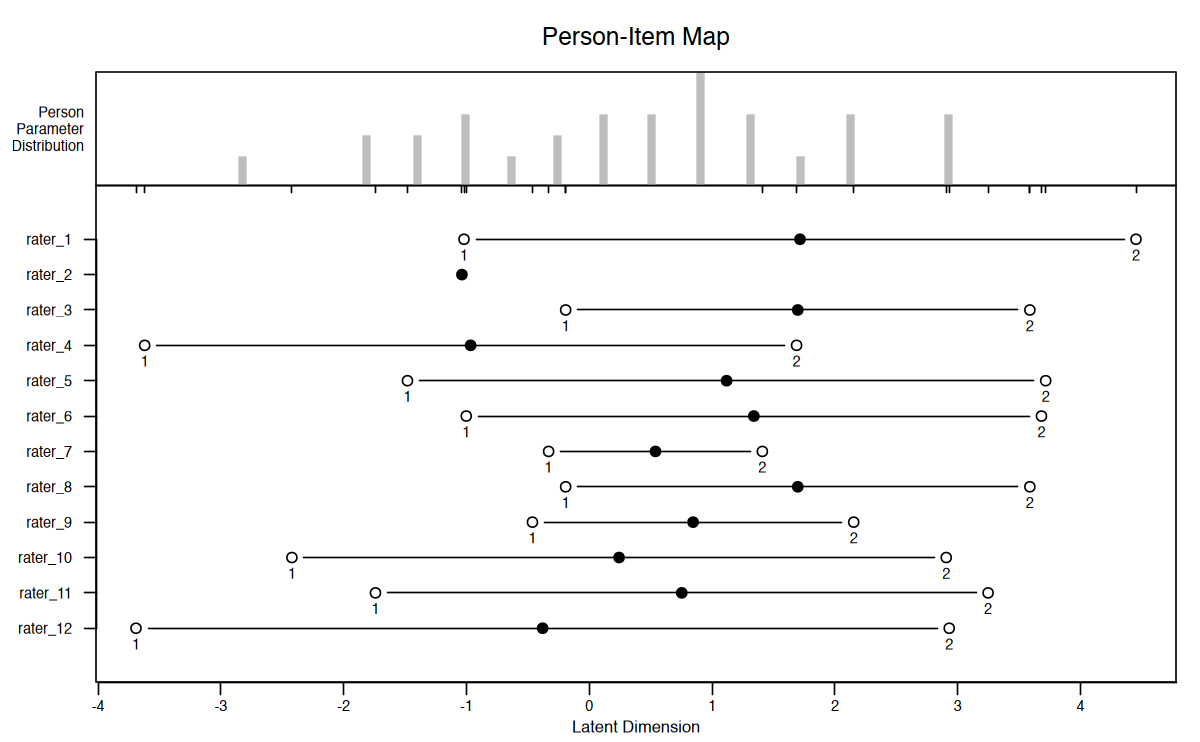

In [8]:
plotPImap(PC_model)

Esaminiamo le CCC per ciascun item.

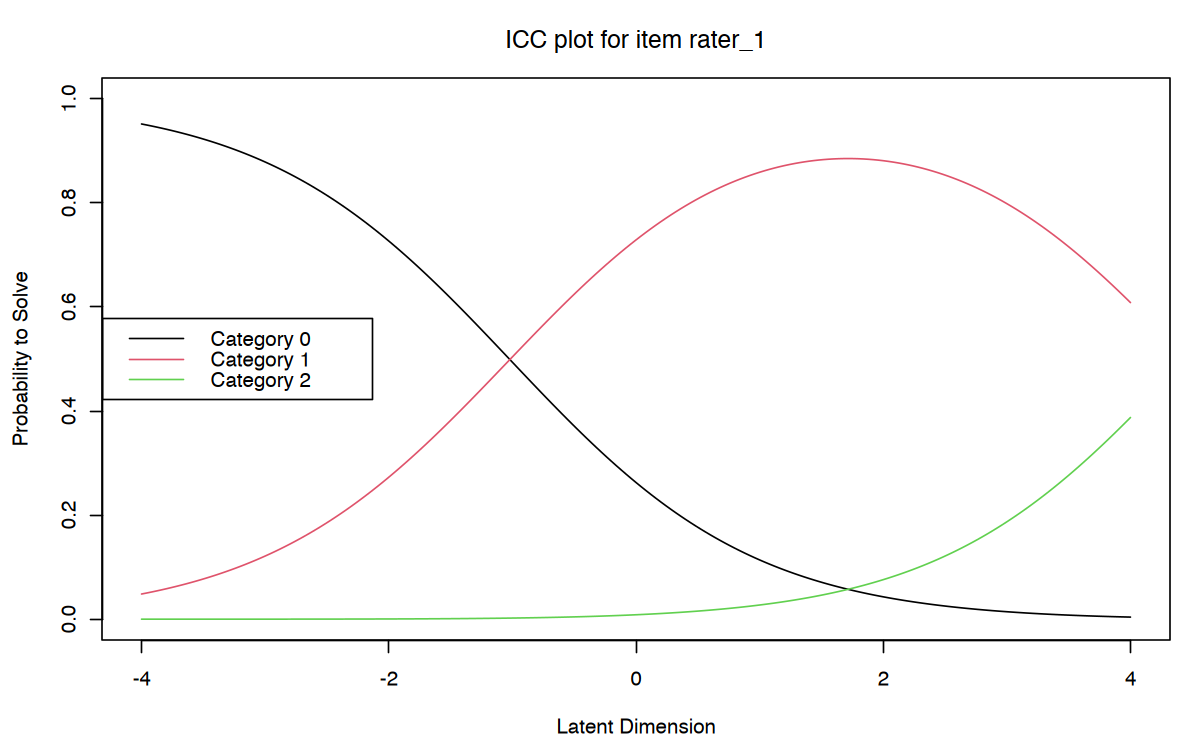

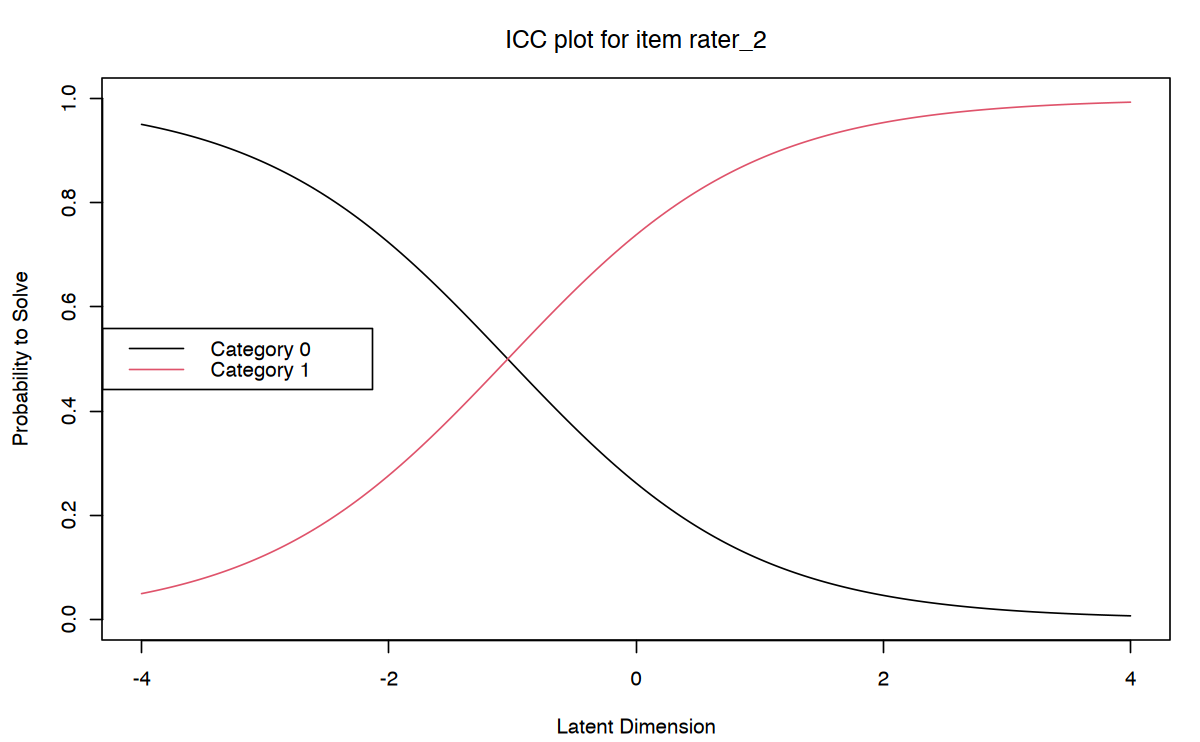

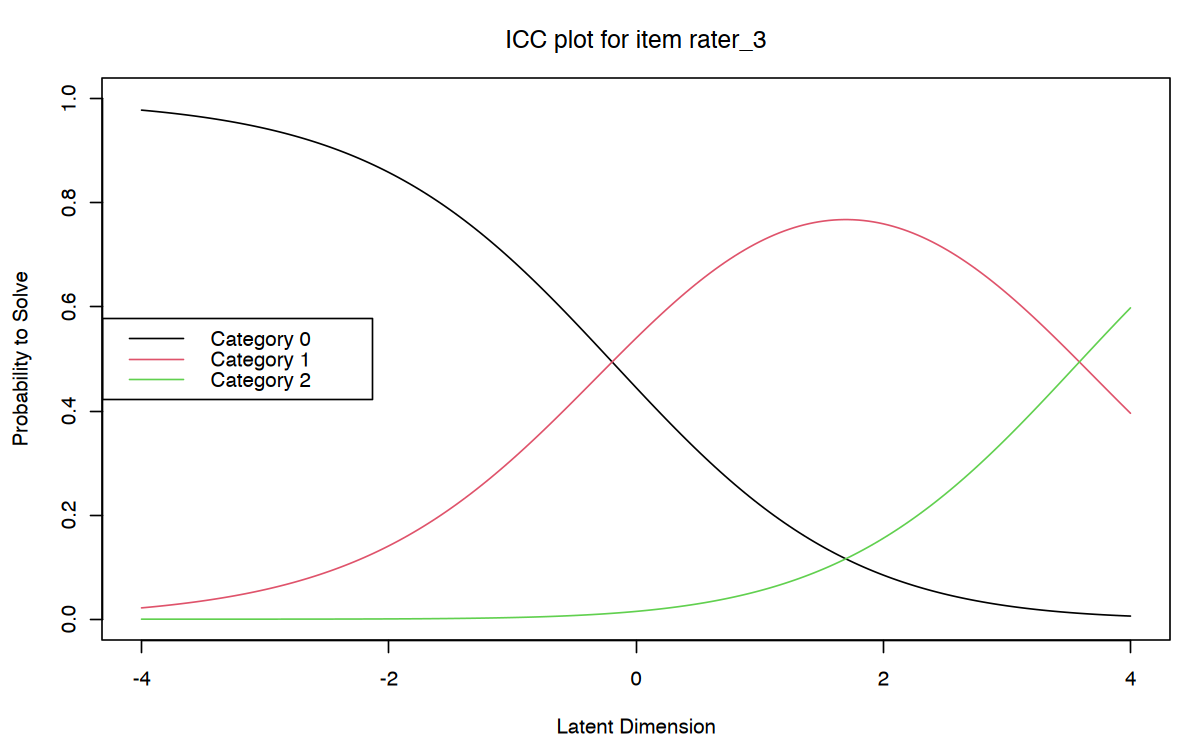

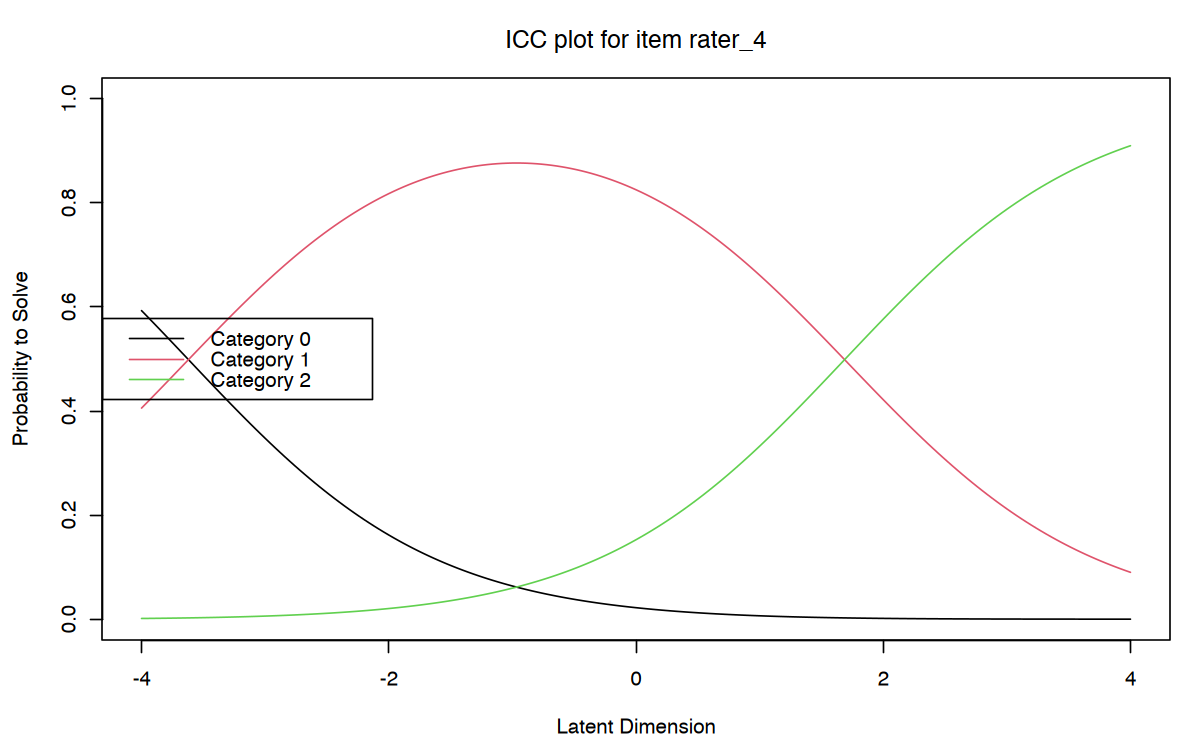

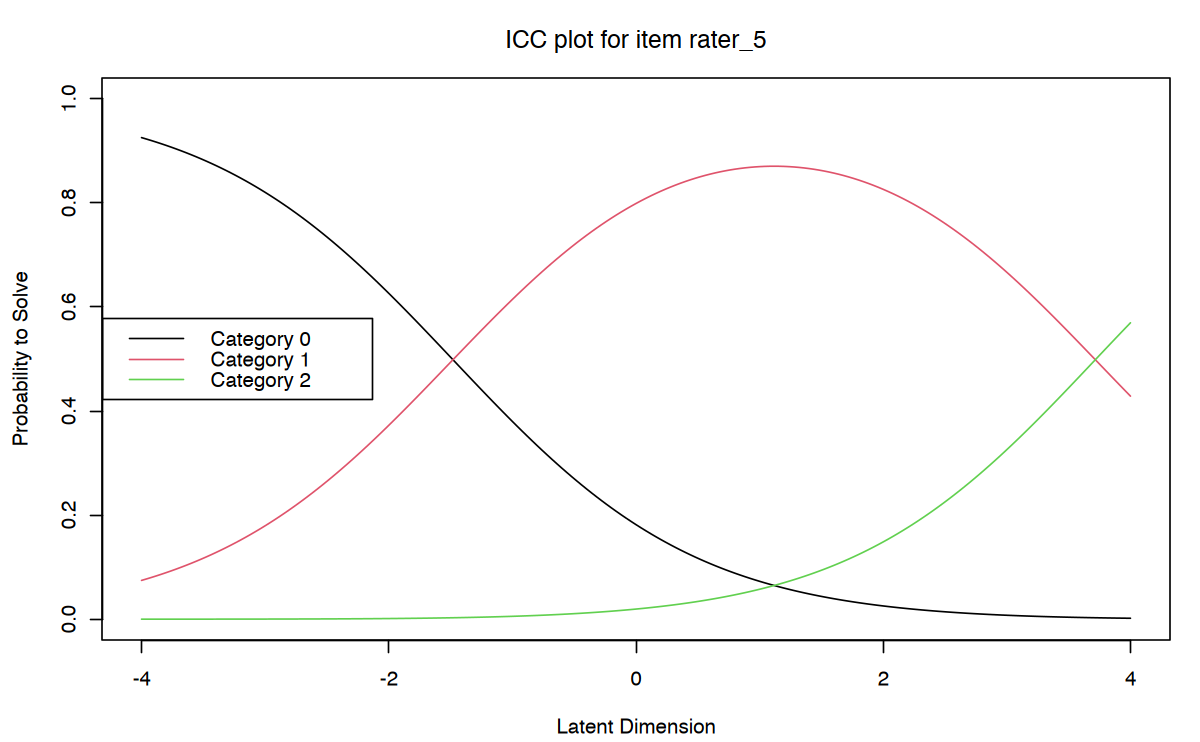

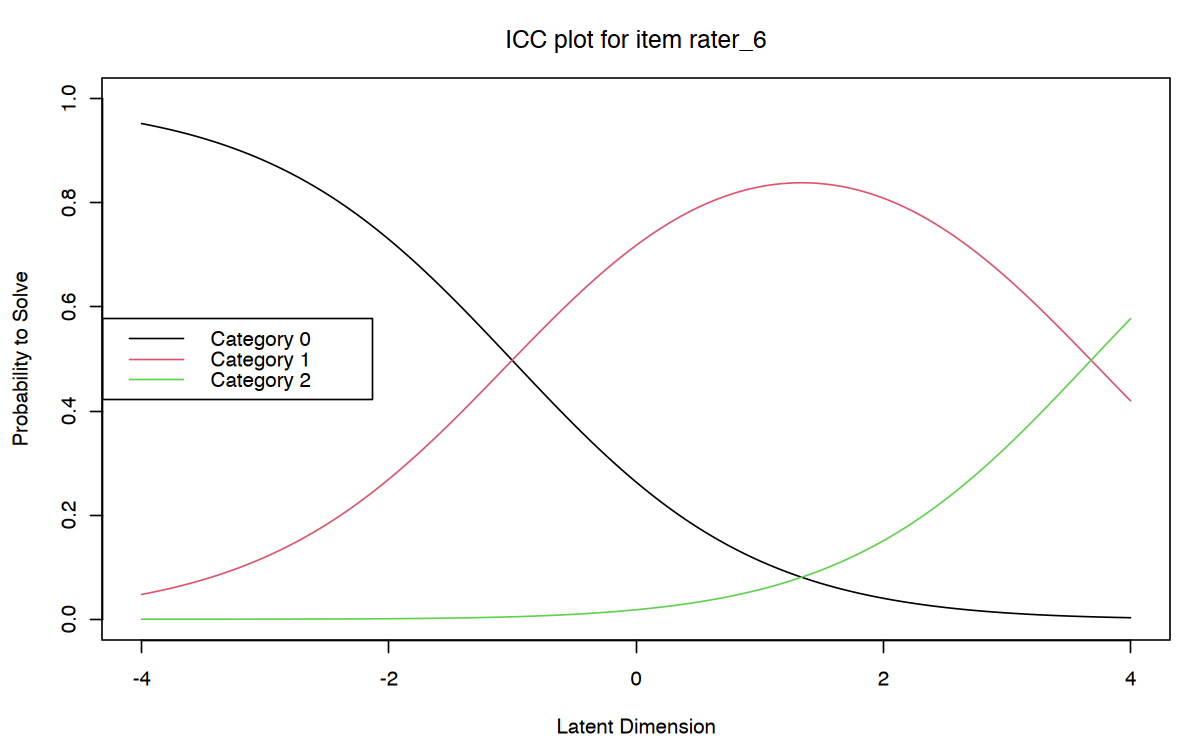

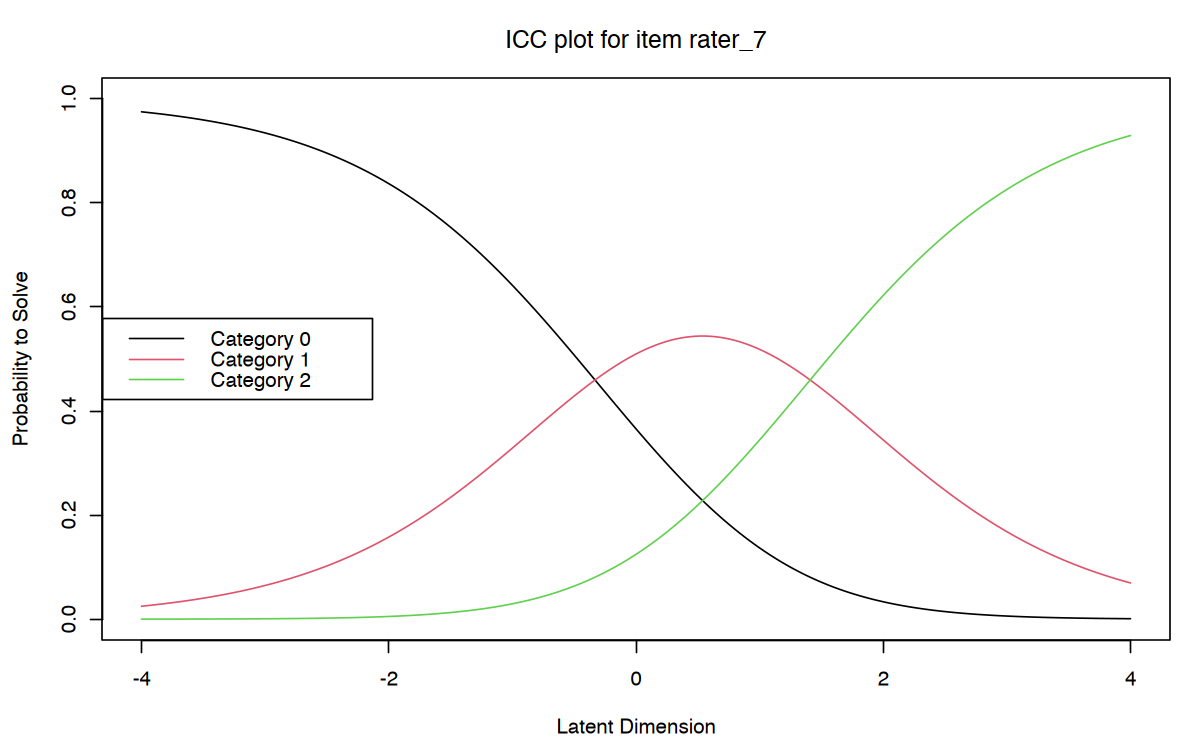

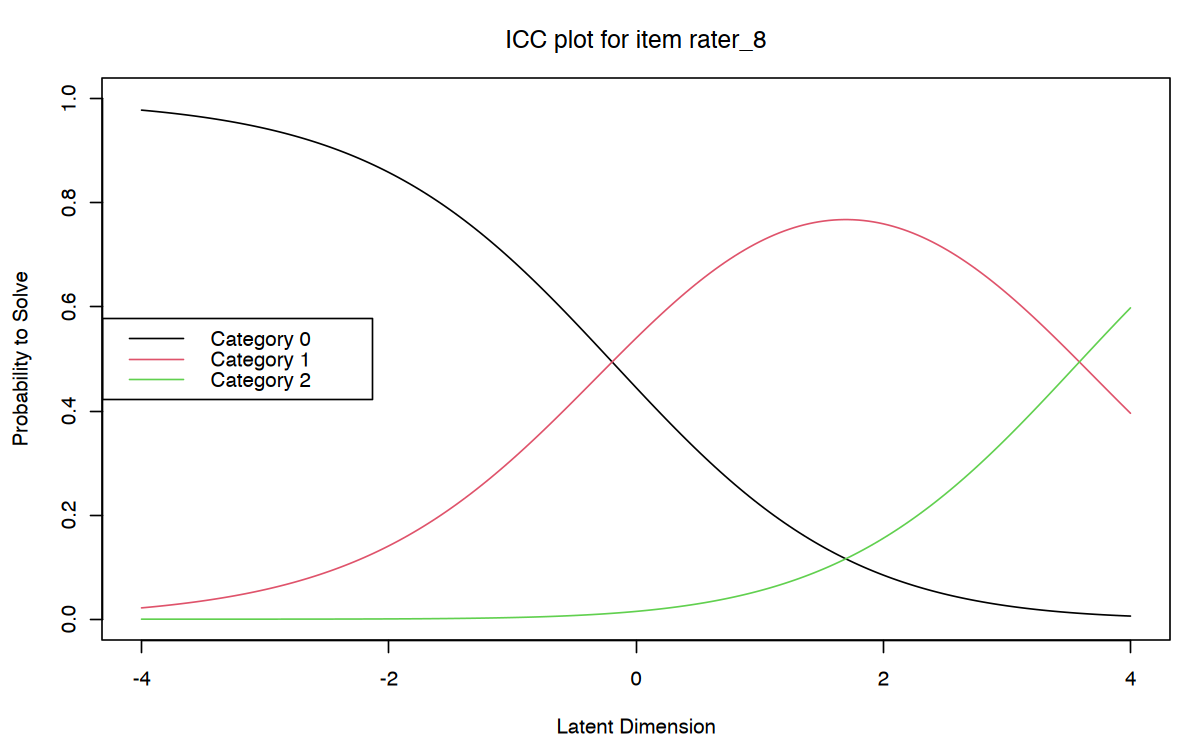

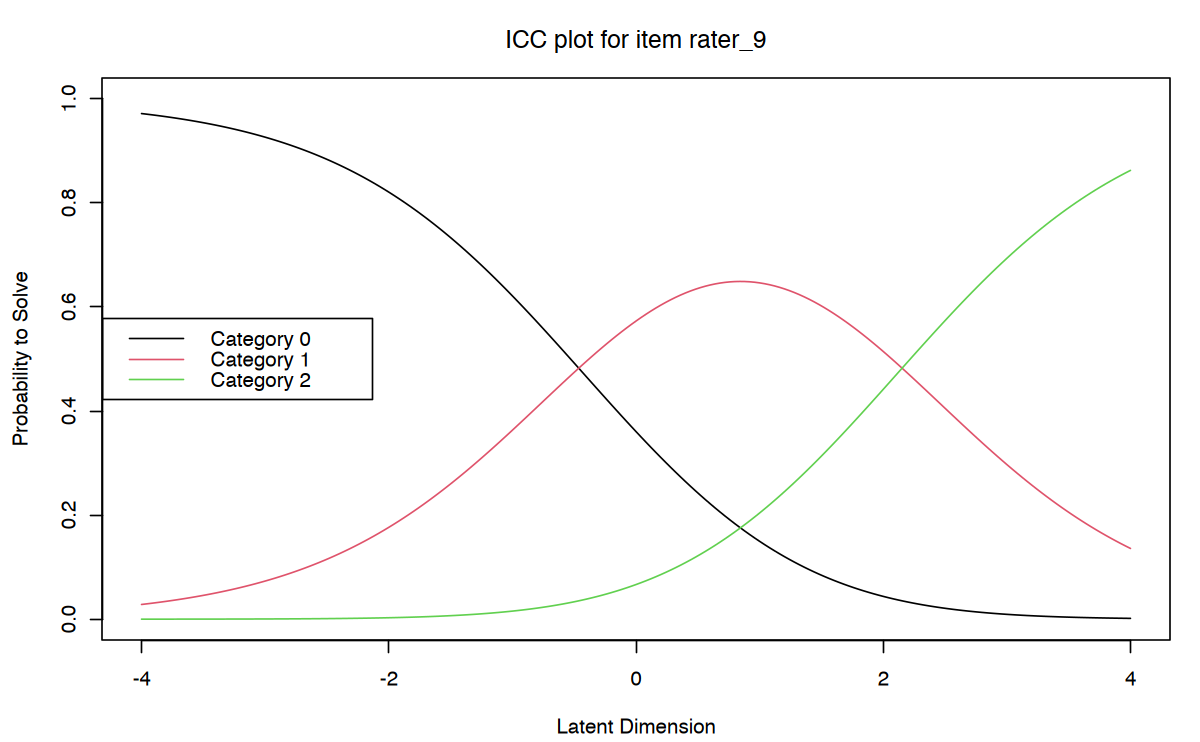

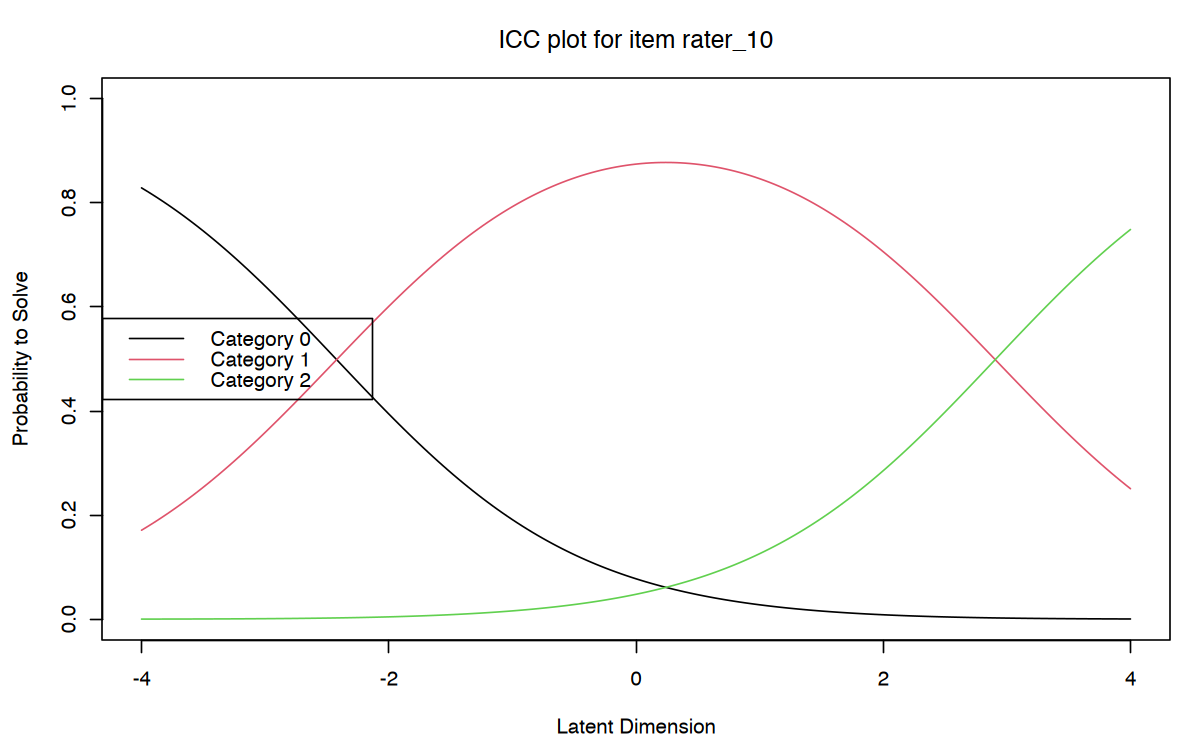

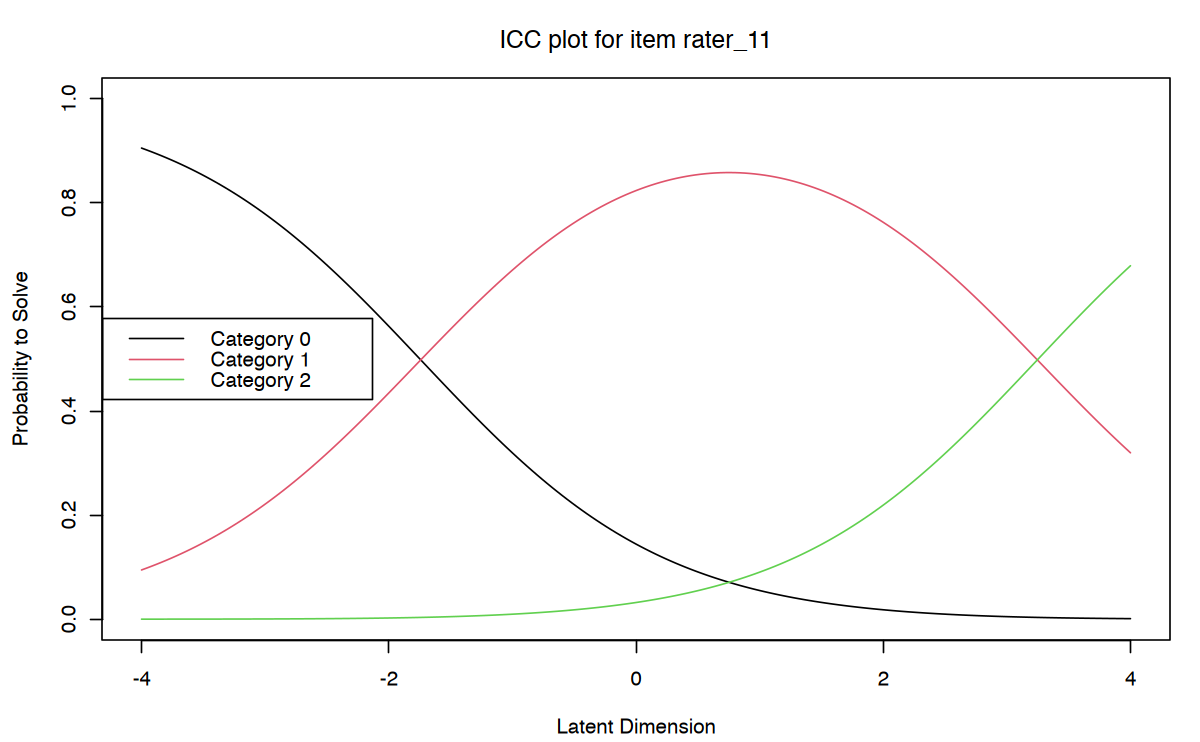

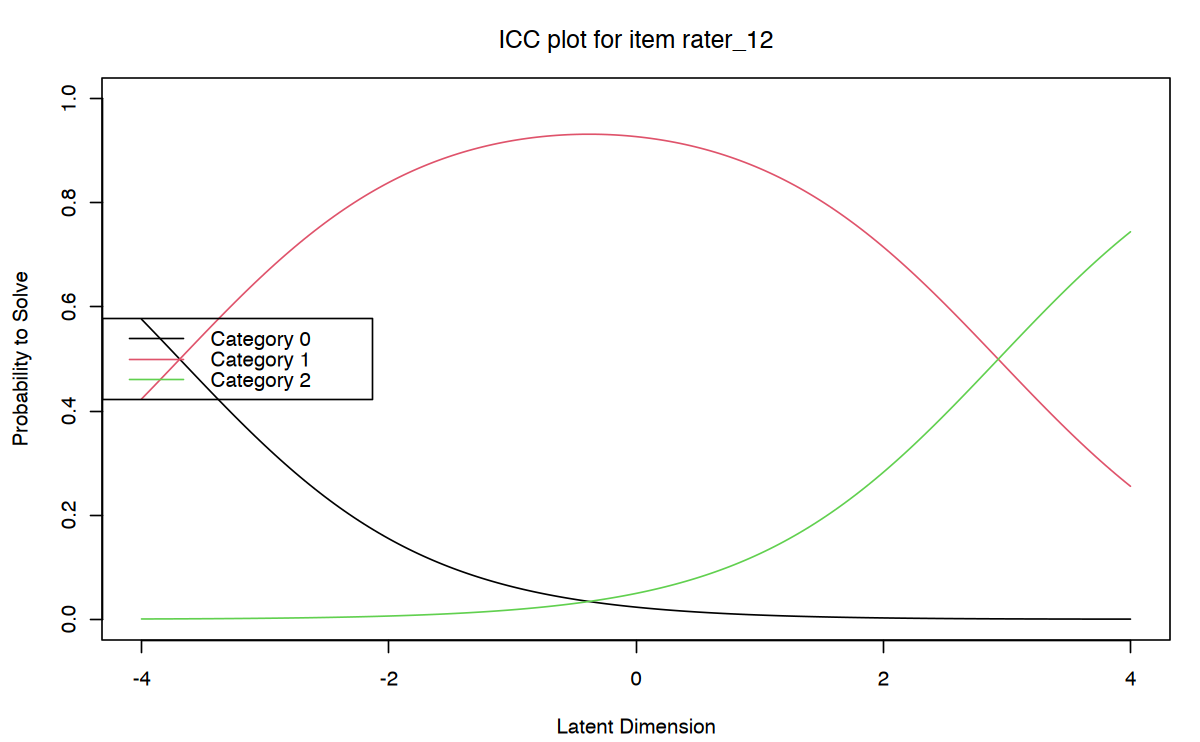

In [9]:
plotICC(PC_model, ask = FALSE)

Consideriamo ora le stime delle posizioni e delle soglie degli item (o "rater", valutatori, nel contesto di una valutazione soggettiva) all'interno del modello. 

Nell'output, la colonna "Location" indica la posizione media o la difficoltà generale dell'item. Un valore più alto indica un item più difficile (o un valutatore più severo), mentre un valore più basso indica un item più facile (o un valutatore più indulgente).

In [10]:
item.estimates <- thresholds(PC_model)
item.estimates


Design Matrix Block 1:
         Location Threshold 1 Threshold 2
rater_1     1.715      -1.020        4.45
rater_2    -1.037      -1.037          NA
rater_3     1.697      -0.193        3.59
rater_4    -0.967      -3.621        1.69
rater_5     1.118      -1.481        3.72
rater_6     1.340      -1.002        3.68
rater_7     0.539      -0.332        1.41
rater_8     1.697      -0.193        3.59
rater_9     0.845      -0.463        2.15
rater_10    0.242      -2.422        2.91
rater_11    0.753      -1.741        3.25
rater_12   -0.380      -3.691        2.93


Nell'output, le colonne "Threshold 1" e "Threshold 2" rappresentano le soglie tra le categorie di risposta per ciascun item. Queste soglie indicano i punti lungo la scala di abilità in cui un rispondente ha probabilità uguali di essere classificato nella categoria successiva rispetto alla categoria corrente. Ad esempio, la soglia tra le categorie 0 e 1, e tra le categorie 1 e 2, ecc.

In [11]:
item_difficulty <- item.estimates[["threshtable"]][["1"]]
item_difficulty

,Location,Threshold 1,Threshold 2
rater_1,1.715,-1.020,4.45
rater_2,-1.037,-1.037,NA
rater_3,1.697,-0.193,3.59
rater_4,-0.967,-3.621,1.69
rater_5,1.118,-1.481,3.72
rater_6,1.340,-1.002,3.68
rater_7,0.539,-0.332,1.41
rater_8,1.697,-0.193,3.59
rater_9,0.845,-0.463,2.15
rater_10,0.242,-2.422,2.91


Consideriamo ora gli errori standard associati alle stime delle soglie. Questi valori indicano la variabilità o l'incertezza nelle stime delle soglie per ogni item e categoria di risposta. Un errore standard più piccolo indica una stima più precisa, mentre un errore standard più grande suggerisce una maggiore incertezza nella stima.

In [12]:
item.se <- item.estimates$se.thresh
print(item.se)

 thresh beta rater_1.c1  thresh beta rater_1.c2  thresh beta rater_2.c1 
                  0.469                   1.038                   0.479 
 thresh beta rater_3.c1  thresh beta rater_3.c2  thresh beta rater_4.c1 
                  0.436                   0.792                   1.007 
 thresh beta rater_4.c2  thresh beta rater_5.c1  thresh beta rater_5.c2 
                  0.472                   0.508                   0.777 
 thresh beta rater_6.c1  thresh beta rater_6.c2  thresh beta rater_7.c1 
                  0.471                   0.781                   0.483 
 thresh beta rater_7.c2  thresh beta rater_8.c1  thresh beta rater_8.c2 
                  0.512                   0.436                   0.792 
 thresh beta rater_9.c1  thresh beta rater_9.c2 thresh beta rater_10.c1 
                  0.465                   0.556                   0.641 
thresh beta rater_10.c2 thresh beta rater_11.c1 thresh beta rater_11.c2 
                  0.601                   0.538    

Le stime delle abilità dei partecipanti si ottengono nel modo seguente:

In [13]:
person.locations.estimate <- person.parameter(PC_model)
summary(person.locations.estimate)


Estimation of Ability Parameters

Collapsed log-likelihood: -90 
Number of iterations: 6 
Number of parameters: 13 

ML estimated ability parameters (without spline interpolated values): 
          Estimate Std. Err.   2.5 % 97.5 %
theta P1     2.922     0.629  1.6896  4.154
theta P2     0.116     0.618 -1.0959  1.328
theta P3    -0.262     0.612 -1.4604  0.937
theta P4    -1.010     0.617 -2.2194  0.199
theta P5     0.904     0.637 -0.3435  2.152
theta P6     1.313     0.641  0.0568  2.569
theta P7     1.313     0.641  0.0568  2.569
theta P8     0.904     0.637 -0.3435  2.152
theta P9    -0.634     0.610 -1.8309  0.562
theta P10    2.922     0.629  1.6896  4.154
theta P11    0.116     0.618 -1.0959  1.328
theta P12    0.504     0.628 -0.7266  1.735
theta P13    1.723     0.639  0.4701  2.976
theta P14   -1.400     0.633 -2.6402 -0.159
theta P15    2.128     0.634  0.8859  3.371
theta P16    0.904     0.637 -0.3435  2.152
theta P17    0.504     0.628 -0.7266  1.735
theta P18   -0.262 

I valori "Estimate" indicano dove si posiziona il rispondente sulla scala di abilità rispetto agli altri. Un valore più alto indica un'abilità maggiore.  L'errore standard ("Std. Err.") associato a ciascuna stima di abilità indica l'incertezza o la variabilità di quella stima. Un errore standard più piccolo suggerisce una maggiore precisione nella stima dell'abilità, mentre un errore standard più grande indica una maggiore incertezza. L'intervallo di confidenza dà un'idea di dove potrebbe effettivamente cadere il vero valore dell'abilità del rispondente, con un livello di confidenza del 95%. 

Esaminiamo gli indici outfit e infit per valutare quanto bene ciascun item si adatta al modello utilizzato. 

In [14]:
item.fit <- eRm::itemfit(person.locations.estimate)
item.fit


Itemfit Statistics: 
         Chisq df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
rater_1   16.5 31   0.985      0.514     0.618   -1.726  -1.582   0.726
rater_2   28.3 31   0.607      0.884     1.193   -0.042   0.822   0.366
rater_3   39.5 31   0.141      1.235     1.229    0.920   0.974   0.357
rater_4   25.8 31   0.731      0.806     0.821   -0.605  -0.702   0.582
rater_5   27.7 31   0.636      0.866     0.878   -0.326  -0.379   0.549
rater_6   39.0 31   0.154      1.218     1.176    0.810   0.738   0.333
rater_7   14.9 31   0.993      0.466     0.508   -2.432  -2.570   0.845
rater_8   23.1 31   0.844      0.723     0.799   -1.084  -0.826   0.671
rater_9   49.4 31   0.019      1.543     1.324    2.009   1.358   0.336
rater_10  18.4 31   0.965      0.574     0.725   -1.406  -0.997   0.635
rater_11  28.2 31   0.611      0.881     0.827   -0.293  -0.605   0.546
rater_12  30.0 31   0.518      0.937     0.987    0.006   0.069   0.353


Il valore Chi-Quadrato è un test statistico che misura quanto le osservazioni si discostano dalle aspettative sotto il modello. Un valore più alto indica una maggiore discrepanza. Il p-value è associato al test Chi-Quadrato. Un p-value alto (tipicamente > 0.05) suggerisce che l'item si adatta bene al modello, mentre un p-value basso indica un cattivo adattamento. Outfit MSQ (Mean Square Error) misura la sensibilità alle osservazioni anomale o ai valutatori che si comportano in modo imprevedibile. Valori vicini a 1 indicano un buon adattamento; valori molto più alti o più bassi di 1 indicano un adattamento povero. L'indice Infit MSQ (Mean Square Error) è simile all'Outfit MSQ, ma meno sensibile alle osservazioni anomale. Anche qui, valori vicini a 1 sono desiderabili. I valori Outfit t e Infit t sono i punteggi t standardizzati per Outfit e Infit MSQ. Un punteggio t che si discosta molto da 0 (sia positivamente che negativamente) indica un adattamento povero. La discriminazione misura quanto bene l'item distingue tra rispondenti con diversi livelli di abilità. Valori più alti indicano una migliore discriminazione.

In generale, possiamo dire che Rater come "rater_1", "rater_7", e "rater_10" mostrano un buon adattamento al modello. I loro valori Outfit e Infit MSQ sono vicini a 1 e hanno p-value alti nel test Chi-Quadrato. Rater come "rater_3", "rater_6", e "rater_9" mostrano segni di un cattivo adattamento. Per esempio, "rater_9" ha un p-value basso (0.019) e valori Outfit e Infit MSQ relativamente alti. La discriminazione varia tra i rater. Alcuni (come "rater_7") hanno valori più alti, indicando una buona capacità di distinguere tra rispondenti di diversa abilità.

Esaminiamo ora le statistiche di adattamento dei rispondenti:

In [15]:
item.fit.table <- cbind(item.fit[["i.outfitMSQ"]], item.fit[["i.infitMSQ"]], item.fit[["i.infitMSQ"]], item.fit[["i.infitZ"]])
pfit <- eRm::personfit(person.locations.estimate)
pfit


Personfit Statistics: 
    Chisq df p-value Outfit MSQ Infit MSQ Outfit t Infit t
P1  18.32 11   0.075      1.526     1.733     0.89    1.92
P2  10.34 11   0.500      0.862     0.766    -0.10   -0.46
P3   7.51 11   0.757      0.626     0.766    -0.70   -0.55
P4   8.79 11   0.642      0.732     0.813    -0.52   -0.50
P5  10.40 11   0.495      0.867     0.813    -0.05   -0.24
P6   6.93 11   0.805      0.577     0.915    -0.67   -0.01
P7   6.25 11   0.856      0.521     0.438    -0.82   -1.29
P8  17.15 11   0.103      1.429     1.244     0.85    0.62
P9   7.85 11   0.727      0.654     0.763    -0.68   -0.64
P10  8.77 11   0.643      0.731     0.853    -0.21   -0.35
P11 14.84 11   0.190      1.237     1.368     0.59    0.92
P12  5.98 11   0.875      0.498     0.383    -0.94   -1.60
P13  9.74 11   0.554      0.811     0.800    -0.16   -0.30
P14 12.31 11   0.341      1.026     1.074     0.20    0.33
P15 14.14 11   0.225      1.179     1.549     0.48    1.24
P16  8.96 11   0.625      0.747 

- Chisq: Misura quanto le risposte del rispondente si discostano dalle aspettative del modello. Un valore più alto suggerisce una maggiore discrepanza. 
- df: Indica i gradi di libertà per il test del Chi-Quadrato.
- p-value: Associa un valore di probabilità al risultato del Chi-Quadrato. Un p-value alto (tipicamente > 0.05) indica un buon adattamento del rispondente al modello. Un p-value basso suggerisce un cattivo adattamento.
- Outfit MSQ (Mean Square Error): Media quadratica ponderata basata su tutte le risposte del rispondente. Valori vicini a 1 indicano un buon adattamento; valori molto alti o molto bassi indicano un cattivo adattamento.
- Infit MSQ (Mean Square Error): Simile all'Outfit, ma dà più peso alle risposte che sono più informative per la stima dell'abilità del rispondente.
- Outfit t e Infit t: Questi sono i punteggi t standardizzati per Outfit e Infit MSQ. Un punteggio t che si discosta molto da 0 (in senso positivo o negativo) indica un adattamento povero.

Per questi dati, rispondenti come P2, P3, P4, ecc., mostrano un buon adattamento, con p-value elevati e valori Outfit e Infit MSQ vicini a 1. Rispondenti come P1, P17, e P27 mostrano segni di cattivo adattamento. P1 e P17 hanno valori Outfit e Infit MSQ più alti e p-value al limite o al di sotto della soglia di significatività. Rispondenti come P22 e P32 mostrano un adattamento eccellente, con valori molto bassi sia per Outfit che per Infit MSQ e p-value molto alti.
:::

### Il Modello a Scala di Valutazione 

Il Modello a Scala di Valutazione (Rating Scale Model, RSM), introdotto da Andrich nel 1978, rappresenta una versione specifica e più restrittiva del Modello a Crediti Parziali (Partial Credit Model, PCM). La caratteristica distintiva del RSM è l'uniformità nella scala di risposta: questo modello presume che tutti gli item di un test utilizzino esattamente la stessa scala di valutazione, con un numero identico di categorie di risposta e con interpretazioni equivalenti per queste categorie in tutti gli item.

Ad esempio, in un questionario dove ogni domanda presenta quattro opzioni di risposta - "mai", "qualche volta", "spesso", "sempre" - il RSM assumerà che il passaggio da "mai" a "qualche volta" abbia lo stesso significato e la stessa "distanza" interpretativa in ogni domanda del questionario. La stessa logica si applica alle transizioni tra le altre categorie di risposta.

D'altro canto, il PCM offre una flessibilità maggiore. In questo modello, ogni item nel test può avere un numero diverso di categorie di risposta, e la significanza di queste categorie può variare da un item all'altro. Ad esempio, una domanda potrebbe avere tre opzioni di risposta, mentre un'altra nello stesso test potrebbe presentarne cinque. Le soglie, ovvero i punti di transizione tra le categorie di risposta, possono essere diversi per ogni item.

In sostanza, il RSM è un sottocaso del PCM in cui si applica una struttura di risposta standardizzata per tutti gli item: stesse categorie di risposta, stesso numero di queste categorie, e stesse soglie tra le categorie. Mentre il PCM si adatta alle peculiarità di ciascun item, offrendo una maggiore varietà e adattabilità, il RSM adotta un approccio più uniforme e strutturato, imponendo la stessa scala di valutazione a tutti gli item del test.

## Modello a Crediti Parziali Generalizzato

Il Modello a Crediti Parziali Generalizzato (Generalized Partial Credit Model, GPCM) è una versione estesa e più versatile del Modello a Crediti Parziali (Partial Credit Model, PCM). Sviluppato per affrontare alcune limitazioni del PCM e del RSM (Rating Scale Model), il GPCM offre un quadro analitico ancora più flessibile per gestire una varietà di formati di risposta nei test.

Simile al PCM, nel GPCM, ogni item in un test può avere un numero diverso di categorie di risposta. Questa caratteristica lo rende particolarmente adatto per test che includono item con formati di risposta variabili.

A differenza del RSM, che impone la stessa struttura di risposta su tutti gli item, il GPCM permette che ogni item abbia le proprie soglie specifiche. Questo significa che la transizione da una categoria di risposta all'altra può avere significati diversi per item differenti.

Una caratteristica distintiva del GPCM è che permette a ciascun item di avere il proprio parametro di discriminazione. Questo parametro misura quanto efficacemente un item distingue tra rispondenti con livelli diversi di abilità. In altre parole, mentre il PCM assume che tutti gli item abbiano la stessa capacità di discriminazione, il GPCM riconosce che alcuni item possono essere più informativi di altri nel distinguere tra rispondenti.

Il GPCM è particolarmente utile in contesti di test dove gli item variano significativamente in termini di formato, difficoltà e capacità di discriminazione. Ad esempio, in un test educativo, alcune domande potrebbero essere più efficaci nell'identificare studenti con abilità elevate, mentre altre potrebbero essere migliori nel differenziare tra studenti con abilità più basse. Il GPCM permette di modellare questa varietà in modo più accurato e preciso rispetto al PCM o al RSM.

In sintesi, il Generalized Partial Credit Model rappresenta un avanzamento significativo nella teoria della risposta all'item, fornendo una struttura flessibile e adattabile che può essere calibrata per adattarsi alle specifiche caratteristiche di ciascun item in un test. Questa flessibilità lo rende uno strumento prezioso per analisi psicometriche complesse e per la creazione di test che riflettano accuratamente le diverse sfumature delle abilità dei rispondenti.

## Modello di Risposta Nominale

Il Modello di Risposta Nominale (Nominal Response Model, NRM) è un'altra variante nella famiglia dei modelli della teoria della risposta all'item (Item Response Theory, IRT). A differenza dei modelli precedentemente menzionati, come il Generalized Partial Credit Model (GPCM) o il Partial Credit Model (PCM), il NRM è specificamente progettato per analizzare dati di risposta dove le categorie non hanno un ordinamento o una gerarchia naturale. Questo lo rende particolarmente adatto per item con risposte nominali.

Nel NRM, le categorie di risposta per ogni item sono trattate come nominali, il che significa che non esiste un ordine intrinseco o una scala di valutazione. Ad esempio, in un questionario che chiede il colore preferito (rosso, verde, blu, ecc.), non c'è un ordine naturale tra le scelte.

Ogni categoria di risposta all'interno di un item ha il suo parametro unico. Questo approccio differisce dai modelli come il PCM, dove le categorie sono ordinate e hanno soglie specifiche per l'item. Nel NRM, ogni scelta risposta è indipendente e ha il proprio parametro che descrive la probabilità che un rispondente con una certa abilità scelga quella categoria.

Mentre modelli come il PCM o il GPCM presuppongono una struttura ordinale nelle risposte, il NRM non fa tale assunzione, rendendolo ideale per item dove le risposte sono categoriche e non ordinabili.

Il Modello di Risposta Nominale trova applicazione in situazioni di test dove le risposte degli item sono categoriche e non esiste un ordine logico o una scala di preferenza tra le categorie. È utilizzato in ambiti come la ricerca di mercato, i sondaggi di opinione, e in contesti psicometrici dove le domande sono di natura qualitativa piuttosto che quantitativa.

In conclusione, il Nominal Response Model si distingue all'interno della teoria della risposta all'item per la sua capacità di gestire efficacemente dati di risposta nominale. Offre un metodo robusto e flessibile per analizzare risposte a scelta multipla dove le opzioni non implicano un gradimento o una preferenza ordinata, consentendo un'analisi dettagliata e accurata di item con risposte non ordinali.

## Modello di Risposta Graduata

Il Modello di Risposta Graduata (Graded Response Model, GRM), proposto da Samejima, è un approccio fondamentale nella teoria della risposta all'item (IRT) per l'analisi di dati di test con risposte ordinali, come quelle trovate nei questionari psicologici o educativi che utilizzano scale Likert. Questo modello si distingue per la sua capacità di gestire risposte che esprimono gradi o livelli, ad esempio, da "per niente d'accordo" a "completamente d'accordo".

A differenza del Modello a Crediti Parziali (Partial Credit Model, PCM), il GRM utilizza soglie cumulative per modellare le risposte. In questo contesto, ogni soglia indica il punto lungo la scala di abilità in cui un rispondente ha il 50% di probabilità di rispondere a un certo livello o a un livello superiore. Il GRM, quindi, si concentra sul calcolo delle probabilità cumulative di rispondere a un livello specifico o superiore su una scala ordinale fissa.

Il PCM, sviluppato da Masters, differisce significativamente dal GRM. Mentre il GRM è ideale per questionari con scale di risposta fisse e ordinate, il PCM offre una maggiore flessibilità nella gestione degli item. Ogni item nel PCM può avere un numero variabile di categorie di risposta, e ogni transizione tra queste categorie è modellata separatamente, permettendo di calcolare la probabilità di rispondere in una specifica categoria.

Questa differenza rende il PCM particolarmente adatto per valutare risposte che possono variare in termini di correttezza o completezza, come in un test educativo dove le risposte possono essere completamente corrette, parzialmente corrette, o completamente errate. In confronto, il GRM è più comunemente impiegato in ricerche psicologiche e sondaggi dove le risposte riflettono gradi di accordo, soddisfazione, o intensità di un sentimento, su una scala ordinale fissa.

In sintesi, mentre il PCM si adatta bene ai test che richiedono una valutazione dettagliata e specifica di risposte con diverse gradazioni di correttezza, il GRM è più efficace in situazioni dove le risposte sono espressivamente ordinali e scalari, fornendo una misura accurata di gradi o livelli di un tratto o di un'abilità.

## Modello Sequenziale

Il Modello Sequenziale (Sequential Model), sviluppato da Tutz nel 1990 e ulteriormente elaborato nel 1997, è un approccio innovativo nella teoria della risposta all'item (IRT) per analizzare dati di test con risposte ordinate, in particolare quando le risposte possono essere considerate come il risultato di un processo decisionale sequenziale.

Il Modello Sequenziale si basa sull'idea che le risposte a un item siano il risultato di una serie di decisioni. Invece di scegliere direttamente tra diverse categorie di risposta, si presume che i rispondenti passino attraverso una sequenza di passaggi decisionali, con ogni passaggio che porta a una scelta tra due alternative.

Il modello considera la risposta a un item come una serie di decisioni binarie (sì/no). Ad esempio, in un test a scelta multipla, un rispondente potrebbe prima decidere se una risposta è corretta o errata, e poi, se errata, scegliere tra le opzioni rimanenti.

Ogni passaggio decisionale nella sequenza è modellato separatamente. Questo permette una comprensione più dettagliata di come i rispondenti arrivino alla loro scelta finale.

Il modello è particolarmente utile per item complessi dove la risposta finale è il risultato di una serie di considerazioni o giudizi.

Immaginiamo un questionario per la valutazione di un corso. I partecipanti potrebbero prima decidere se il corso è stato generale positivo o negativo (primo stadio decisionale). Se positivo, potrebbero poi decidere se è stato "buono" o "eccellente" (secondo stadio). Se negativo, la scelta potrebbe essere tra "insufficiente" e "mediocre".

Il Modello Sequenziale trova applicazione in situazioni di test complesse, dove le risposte non sono semplicemente scelte tra categorie, ma il risultato di una serie di giudizi o valutazioni. Questo può includere valutazioni educative, sondaggi di opinione, e ricerche psicologiche.

In sintesi, il Modello Sequenziale di Tutz offre una prospettiva unica sull'analisi di risposte ordinate, enfatizzando il processo decisionale a più stadi che sta dietro la selezione di una risposta. 

## Dimensione del Campione

Nel contesto della teoria della risposta all'item (IRT) per dati politomici, la questione della grandezza del campione è fondamentale per garantire l'accuratezza e l'affidabilità delle stime dei parametri del modello. De Ayala (2009) ha fornito una panoramica delle ricerche riguardanti i requisiti di dimensione del campione per i modelli IRT, sia dicotomici che politomici, e ha offerto alcune linee guida utili.

1. **Numero di Categorie di Risposta:** Nei modelli politomici, il numero di categorie di risposta per item influisce significativamente sulla precisione della stima. Maggiore è il numero di categorie, maggiore sarà il numero complessivo di parametri dell'item da stimare.

2. **Distribuzione dei Parametri di Item e Persone:** Come nei modelli dicotomici, la forma e l'allineamento delle distribuzioni dei parametri di item e persone sono importanti. Una distribuzione ben bilanciata può contribuire a una stima più accurata.

De Ayala propone alcune regole empiriche per le dimensioni minime del campione nei modelli politomici:

- **Modello a Crediti Parziali e Modello a Scala di Valutazione:** Per questi modelli, è suggerita una dimensione minima del campione di circa 250 rispondenti. Questo è particolarmente pertinente per test che comprendono, ad esempio, 25 item con 5 categorie di risposta ciascuno.

- **Modello di Risposta Graduata:** Per il GRM, è raccomandata una dimensione del campione di circa 500 rispondenti, soprattutto quando si lavora con un numero elevato di item e categorie di risposta.

Problemi nella convergenza dell'algoritmo di stima e la presenza di errori standard elevati possono essere segnali che la dimensione del campione utilizzato non è sufficiente per una stima affidabile dei parametri del modello.

In sintesi, la scelta della grandezza del campione nei modelli IRT politomici deve considerare diversi fattori, inclusi il numero di item, il numero di categorie di risposta per item e il rapporto tra il numero di rispondenti e il numero di parametri dell'item da stimare. Seguendo le linee guida suggerite, i ricercatori possono assicurarsi di avere un campione di dimensioni adeguate per ottenere stime affidabili dei parametri del modello.

## Session Info

In [19]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] kableExtra_1.4.0  latex2exp_0.9.6   WrightMap_1.4     psychotools_0.7-4
 [5] ggmirt_0.1.0      TAM_4.2-21        CDM_8.2-6         mvtnorm_1.3-1    
 [9] mirt_1.42         lattice_0.22-6    eRm_1.0-6         ggokabeito_0.1.0 
[13] viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0      ggExtra_0.10.1   
[17] bayesplot_1.11.1  gridExtra_2.3     patchwork_1.3.0   semTools_0.5-6   
[21] semPlot_1.1.6     lavaan_0.6-18     psych_2.4.6.26    scales_1.3.0     
[25] ma